In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from functions.utils import *

In [2]:
fr_es = open('../data/raw/es-fr_1-100.wa', 'r')
alignements = transform_alignement_file(fr_es.readlines())

es_100 = open('../data/raw/1-100-final.es', 'r')
sentences_es = transform_sentence_file(es_100.readlines())

fr_100 = open('../data/raw/1-100-final.fr', 'r')
sentences_fr = transform_sentence_file(fr_100.readlines())

es_vectors = np.load('../data/processed/vector_es_100.npy',allow_pickle=True)
fr_vectors = np.load('../data/processed/vector_fr_100.npy',allow_pickle=True)

In [6]:
def analysis(n_sentences):
    ids = []
    costs = []
    for sentence_id in np.random.choice(n_sentences, 100, replace=False).tolist():
            
        es_vector = np.asarray(es_vectors[sentence_id])
        fr_vector = np.asarray(fr_vectors[sentence_id])

        cost = 1-cosine_similarity(es_vector,fr_vector)

        ids = ids + [sentence_id]*(cost.shape[0]*cost.shape[1])
        costs = costs + cost.reshape(cost.shape[0]*cost.shape[1]).tolist()
        
    dict = {"Id":ids,"Cost":costs}
    df = pd.DataFrame(dict)
    return df

In [7]:
data = analysis(100)

<AxesSubplot:xlabel='Id', ylabel='Cost'>

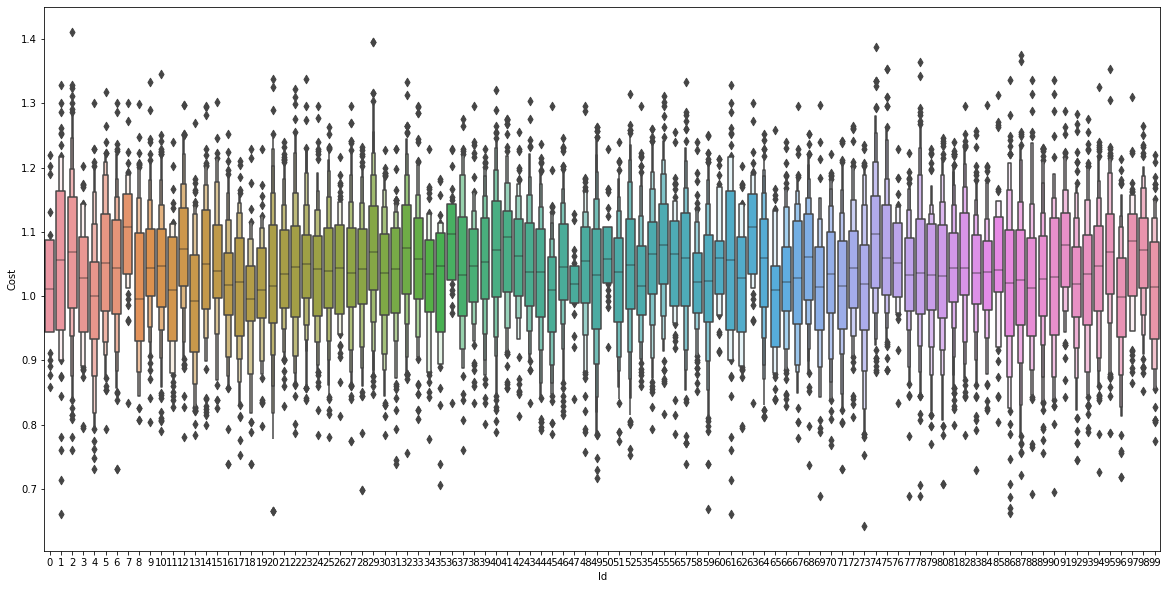

In [8]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=data, x="Id", y="Cost")